#               BLOOD DONATION PREDICTION PROJECT

## Problem statement:-
### Based on the given features predict whether the person will donate blood or not

# -- Pipeline --
1. Importing Libraries
2. Data Collection
3. Domain Analysis
4. Exploratory Data Analysis
5. Data PreProcessing
6. Feature Selection
7. Model Building
8. Model Evaluation
9. Conclusion

In [1]:
# importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score

In [2]:
# Loading dataset
data=pd.read_csv("Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv")
data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


In [3]:
data.drop("Unnamed: 0",axis=1,inplace=True) # dropping unwanted features

# basic checks

In [4]:
data.head() # display initial 5 rows

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
data.tail() # displaying final 5 rows


,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,23,1,250,23,0
572,16,3,750,86,0
573,21,2,500,52,0
574,39,1,250,39,0
575,72,1,250,72,0


In [6]:
data.describe() ## Statistical information about numerical data

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [7]:
data.shape ## Finding the shape of dataset

(576, 5)

####  There are 576 rows and 5 columns present in a dataset

In [8]:
data.duplicated().sum() # findinf duplicate records

153

In [9]:
data.drop_duplicates(inplace=True) # dropping duplicate records

In [10]:
data.duplicated().sum() # no duplicate values left

0

In [11]:
data.info() ## Quick summary of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 575
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Months since Last Donation   423 non-null    int64
 1   Number of Donations          423 non-null    int64
 2   Total Volume Donated (c.c.)  423 non-null    int64
 3   Months since First Donation  423 non-null    int64
 4   Made Donation in March 2007  423 non-null    int64
dtypes: int64(5)
memory usage: 19.8 KB


## Domain Knowledge

# EDA

## Univariate Analysis


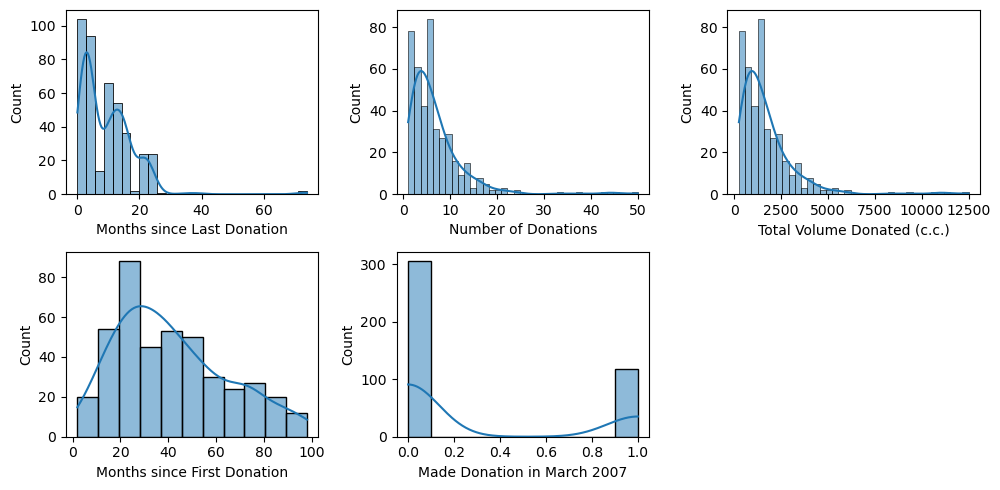

In [12]:
plt.figure(figsize=(10,5))
plotnumber=1
for i in data:
    plt.subplot(2,3,plotnumber)
    sns.histplot(x=data[i],kde=True)
    plotnumber+=1
plt.tight_layout()  

### Insights from univariate analysis

## Bivariate Analysis

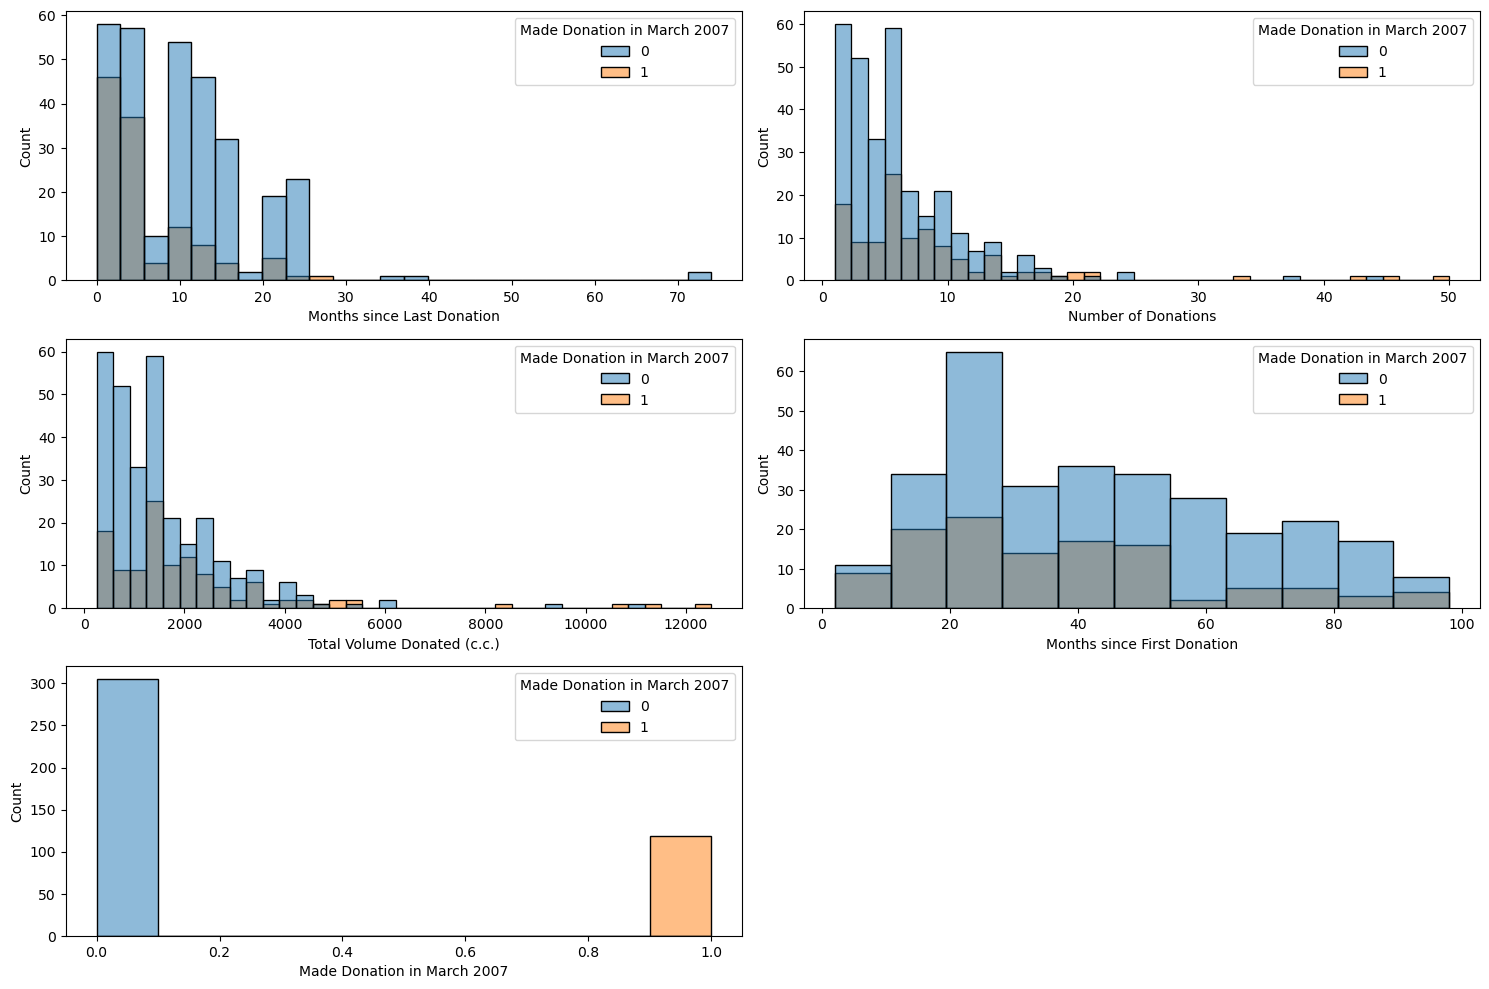

In [13]:
plt.figure(figsize=(15,10))
plotnumber=1
for i in data:
    plt.subplot(3,2,plotnumber)
    sns.histplot(x=i,hue='Made Donation in March 2007',data=data)
    plotnumber+=1
plt.tight_layout()     

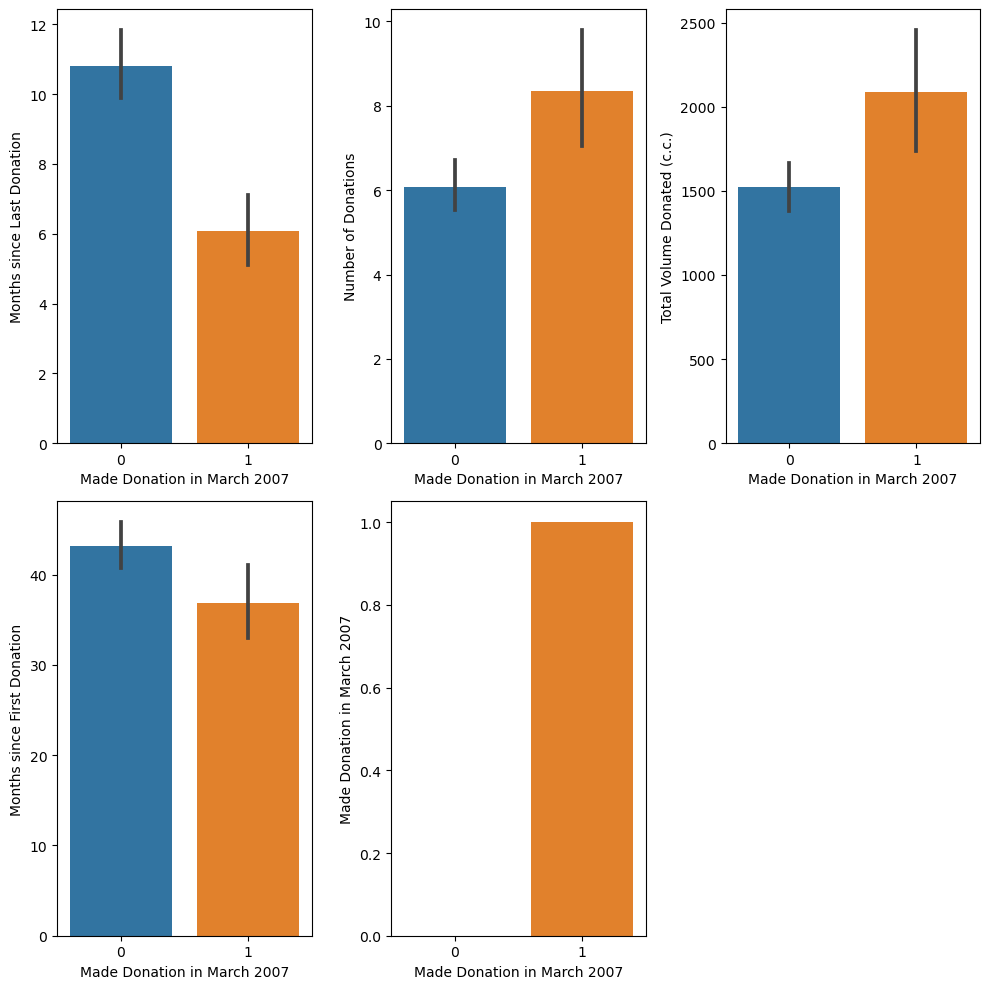

In [14]:
plt.figure(figsize=(10,10))
plotnumber=1
for i in data:
    plt.subplot(2,3,plotnumber)
    sns.barplot(x=data["Made Donation in March 2007"],y=data[i])
    plotnumber+=1
plt.tight_layout() 

### Insights from bivariate analysis

## multivariate analysis

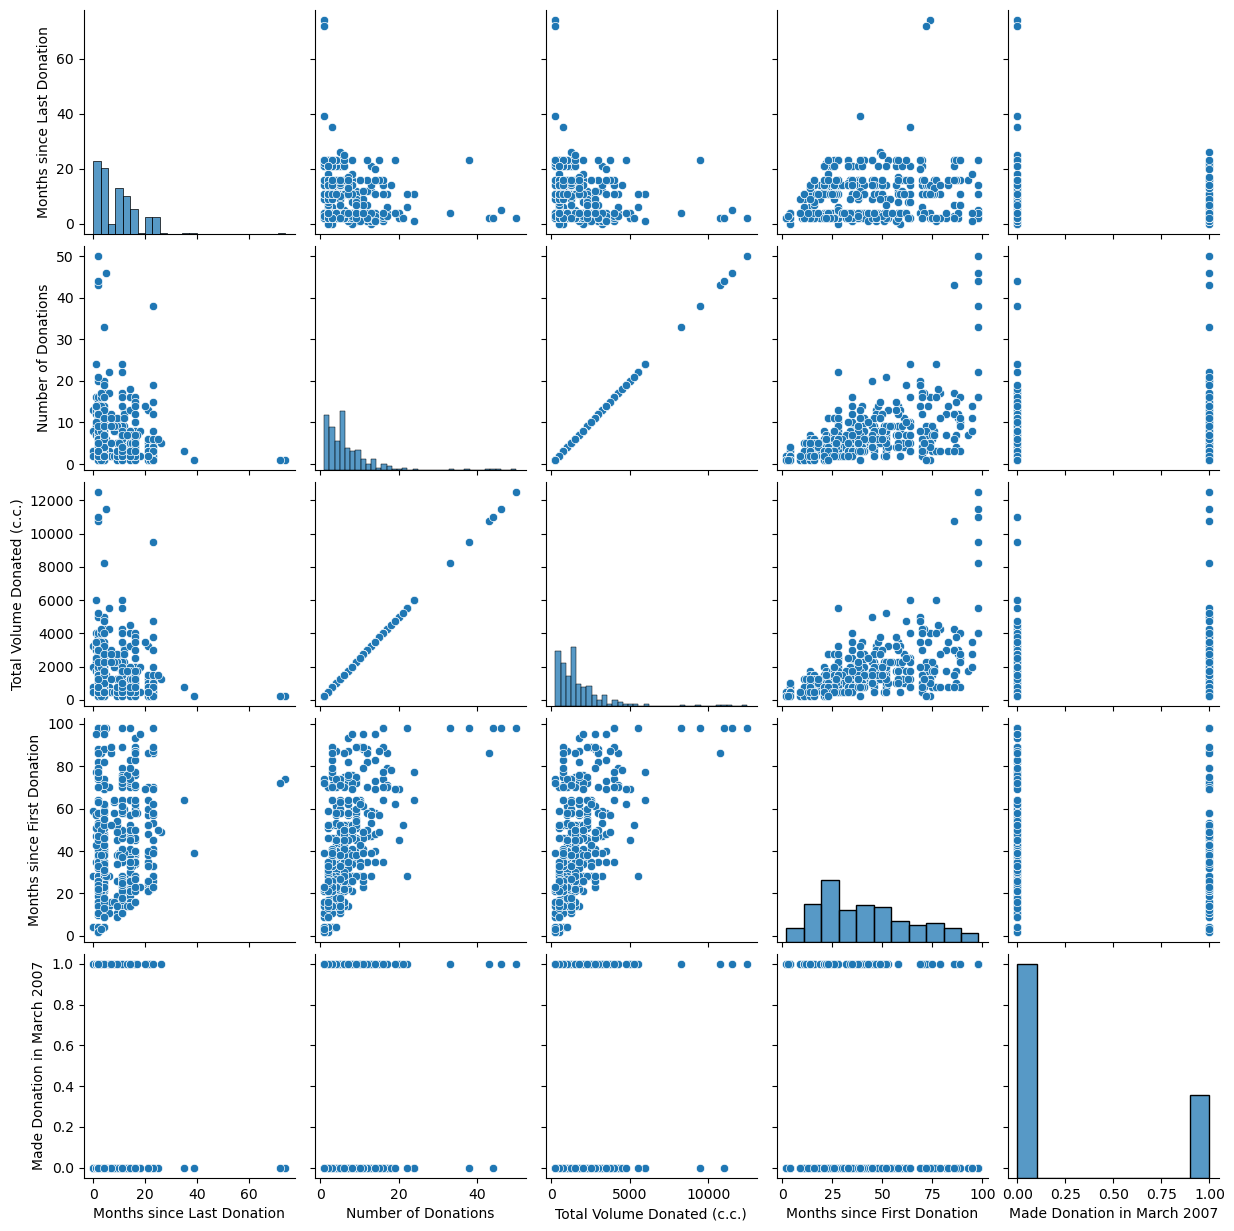

In [15]:
sns.pairplot(data) 
plt.show()

# Data Preprocessing

### Cheacking Outliers present in dataset  using boxplot

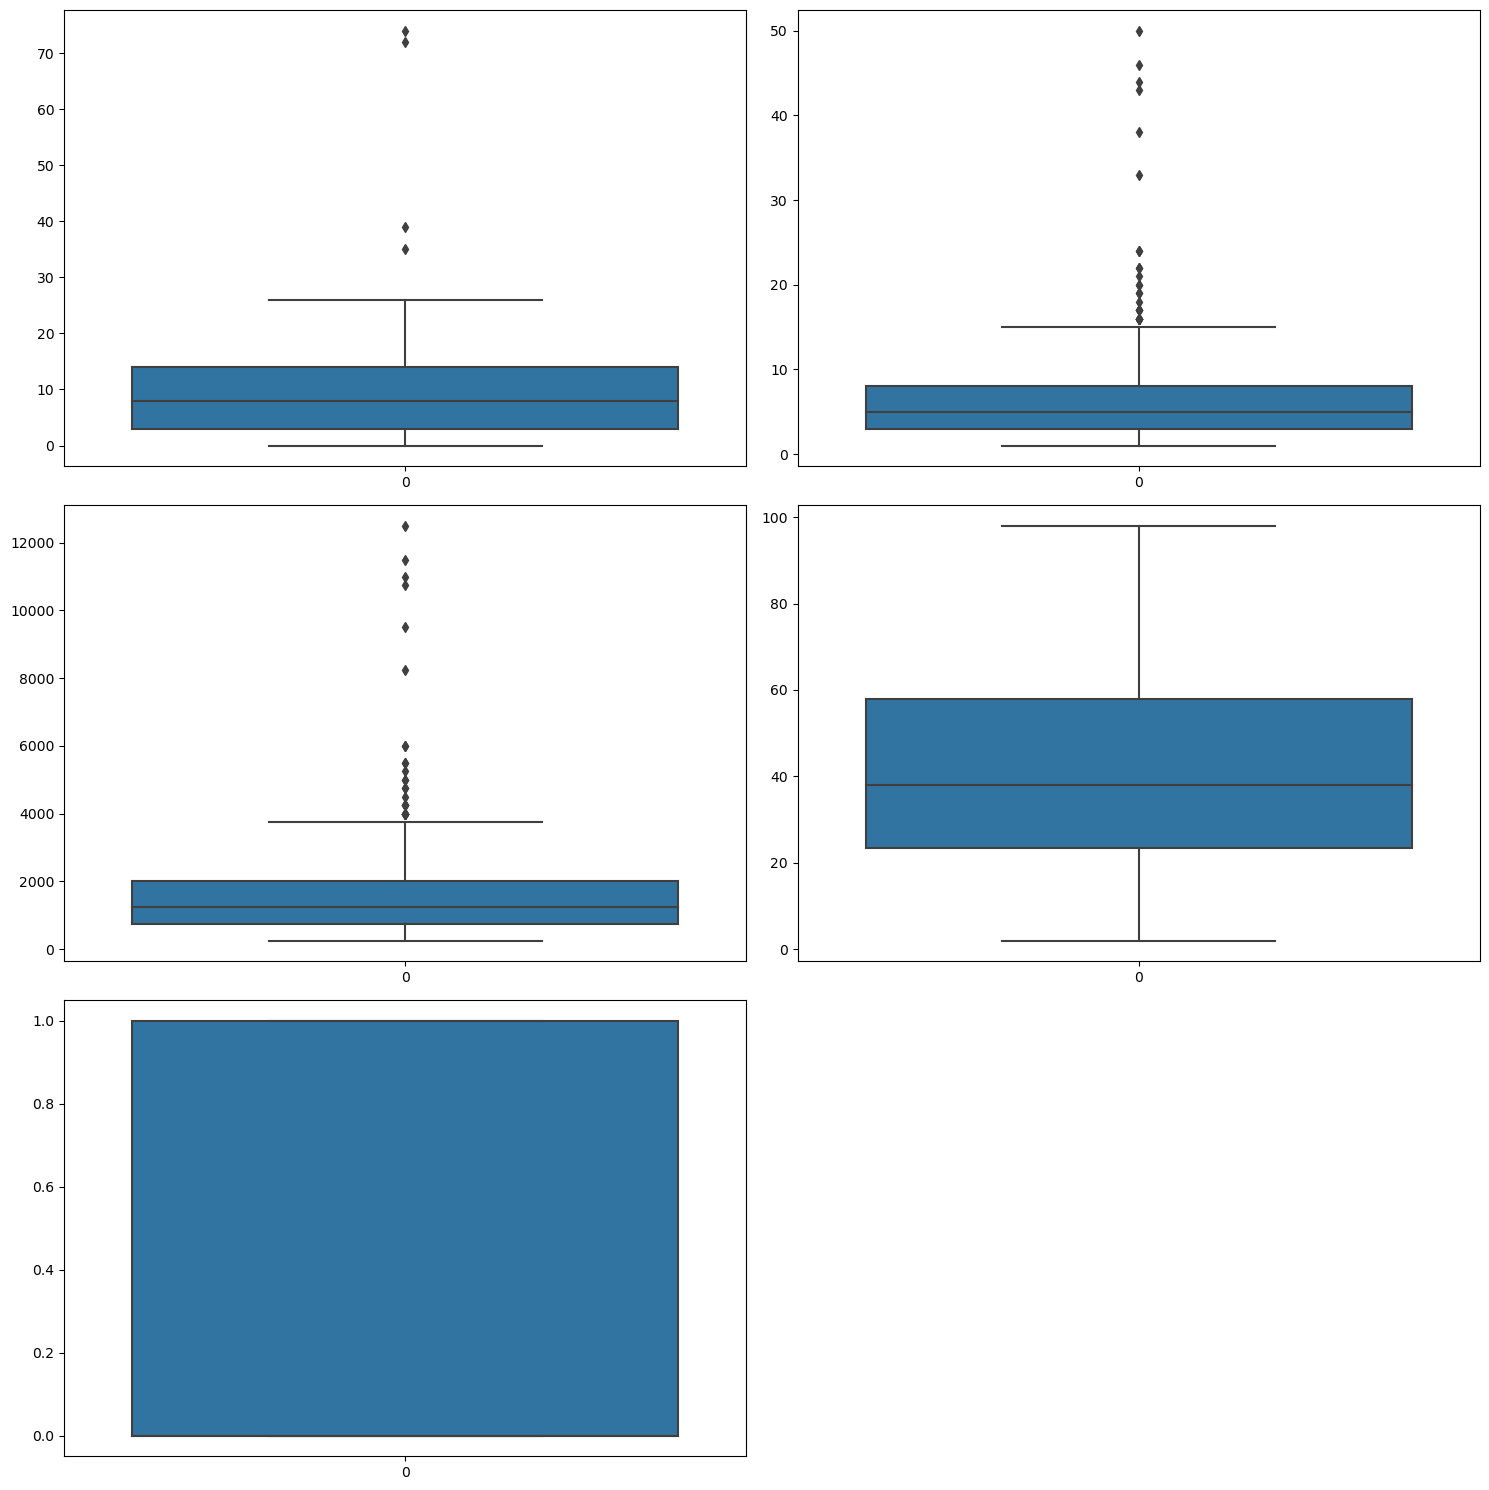

In [16]:
plt.figure(figsize=(15,15))
plotnumber=1
for i in data:
    plt.subplot(3,2,plotnumber)
    sns.boxplot(data[i])
    plotnumber+=1
plt.tight_layout()     

#### Replacing outliers by mean/median

In [17]:
data.loc[data['Months since Last Donation']>32,'Months since Last Donation']=np.median(data['Months since Last Donation'])

In [18]:
data.loc[data['Number of Donations']>12,'Number of Donations']=np.median(data['Number of Donations'])

In [19]:
data.loc[data['Total Volume Donated (c.c.)']>3000,'Total Volume Donated (c.c.)']=np.median(data['Total Volume Donated (c.c.)'])

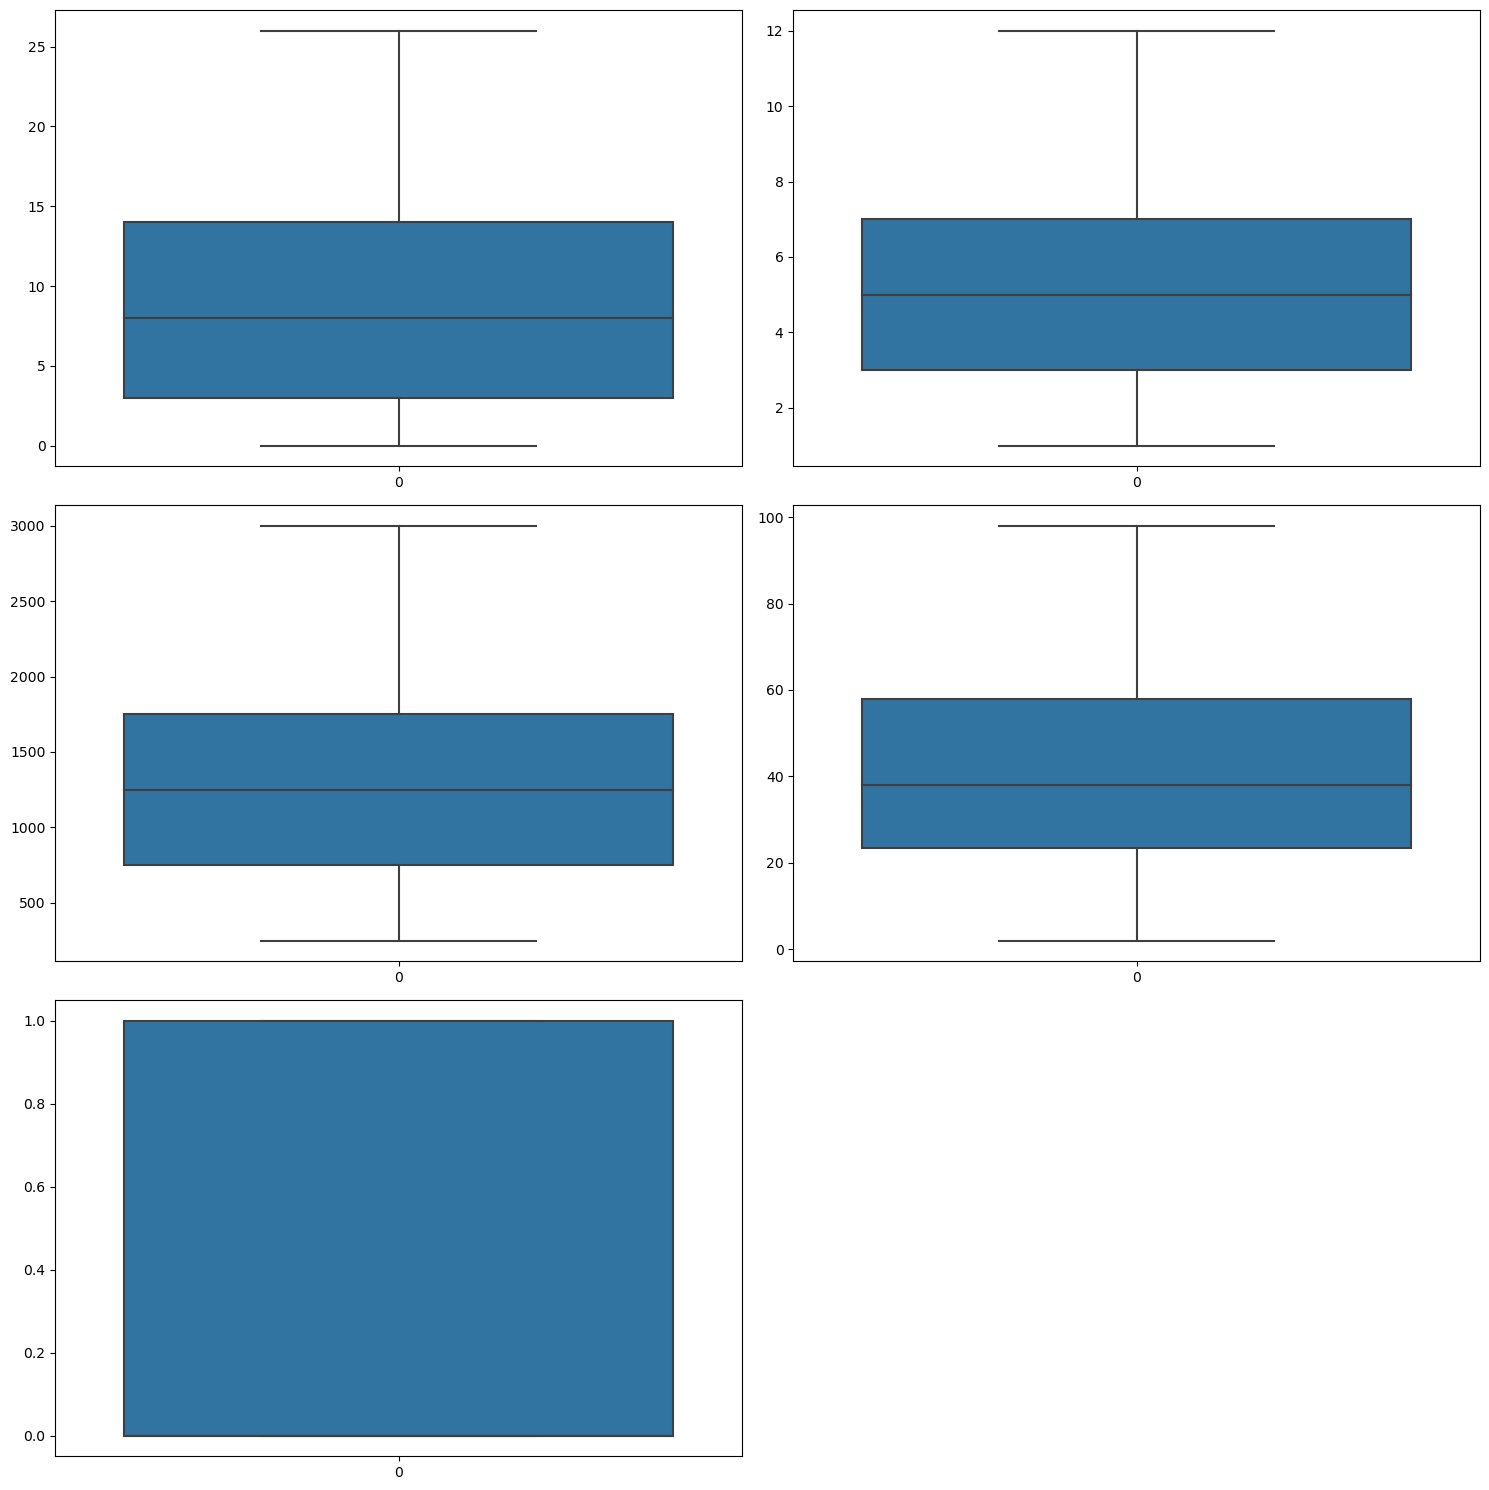

In [20]:
plt.figure(figsize=(15,15))
plotnumber=1
for i in data:
    plt.subplot(3,2,plotnumber)
    sns.boxplot(data[i])
    plotnumber+=1
plt.tight_layout()     

#### No outliers left

# Feature Enginerring

In [21]:
data.corr() # checking correlation

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
Months since Last Donation,1.000000,-0.204064,-0.204064,0.147741,-0.269672
Number of Donations,-0.204064,1.000000,1.000000,0.379054,0.090574
Total Volume Donated (c.c.),-0.204064,1.000000,1.000000,0.379054,0.090574
Months since First Donation,0.147741,0.379054,0.379054,1.000000,-0.121118
Made Donation in March 2007,-0.269672,0.090574,0.090574,-0.121118,1.000000


<AxesSubplot:>

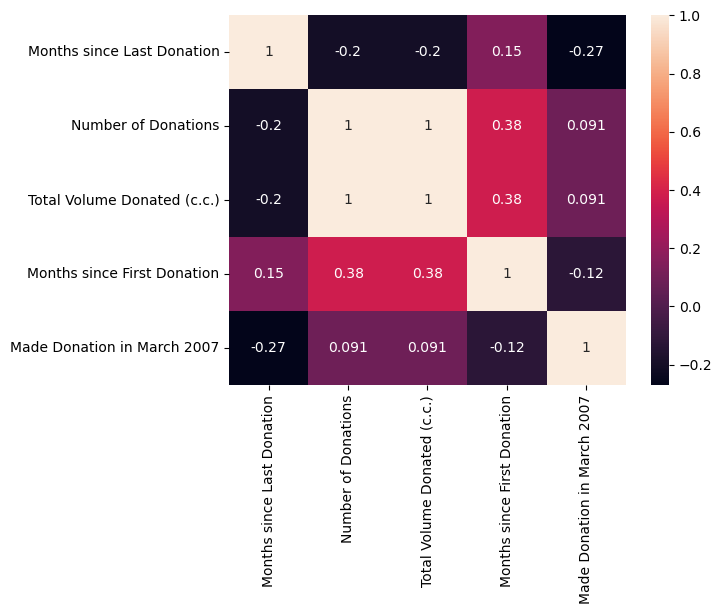

In [22]:
# checking correlation using heatmap
sns.heatmap(data.corr(),annot=True) 

In [23]:
# using threshold method
def correlation(data,threshold):
    col_corr=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr          

In [24]:
corr_features=correlation(data,0.7)
len(set(corr_features))

1

In [25]:
# Highly correlated feature 
corr_features

{'Total Volume Donated (c.c.)'}

In [26]:
## dropping Highly correlated feature 
data.drop('Total Volume Donated (c.c.)',axis=1,inplace=True) 

In [27]:
data.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Made Donation in March 2007
0,2,5,98,1
1,0,5,28,1
2,1,5,35,1
3,2,5,45,1
4,1,5,77,0


#### Selecting dependent and independent values

In [28]:
x=data.iloc[:,:3]
y=data.iloc[:,3]

#### Scaling of data

In [29]:
sc=StandardScaler() # using standard scaler method

In [30]:
x_final=sc.fit_transform(x)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x_final,y,test_size=0.3,random_state=42)

In [32]:
y.value_counts()

0    305
1    118
Name: Made Donation in March 2007, dtype: int64

##### Balancing the data using SMOTE 

In [33]:
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [34]:
print(Counter(y_train))

Counter({0: 216, 1: 80})


In [35]:
print(Counter(y_sm)) # balanced data

Counter({1: 216, 0: 216})


# Model building
## Logistic Regression

In [36]:
LR=LogisticRegression()
LR.fit(x_sm,y_sm)

LogisticRegression()

In [37]:
y_pred=LR.predict(x_test)  # for testing data
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [38]:
acc=accuracy_score(y_test,y_pred)
acc

0.6062992125984252

In [39]:
f1_value=f1_score(y_test,y_pred)
f1_value

0.5098039215686275

In [40]:
recall=recall_score(y_test,y_pred)
recall

0.6842105263157895

In [41]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[51 38]
 [12 26]]
              precision    recall  f1-score   support

           0       0.81      0.57      0.67        89
           1       0.41      0.68      0.51        38

    accuracy                           0.61       127
   macro avg       0.61      0.63      0.59       127
weighted avg       0.69      0.61      0.62       127



In [42]:
y_pred_train=LR.predict(x_sm)
acc_train=accuracy_score(y_sm,y_pred_train)
acc_train

0.6712962962962963

In [43]:
print(classification_report(y_sm,y_pred_train)) # for training data

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       216
           1       0.66      0.70      0.68       216

    accuracy                           0.67       432
   macro avg       0.67      0.67      0.67       432
weighted avg       0.67      0.67      0.67       432



In [44]:
from sklearn.model_selection import cross_val_score

cross_val=cross_val_score(LR,x_sm,y_sm,cv=3,scoring="f1")
cross=cross_val.mean()
cross

0.6967160874445643

In [45]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics

In [46]:
roc_score=metrics.roc_auc_score(y_test,y_pred)
roc_score

0.628622117090479

# KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()

In [48]:
error_rate=[]
for i in range(1,15):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_sm, y_sm)
    y_pred_knn=model.predict(x_test)
    error_rate.append(np.mean(y_pred_knn!=y_test))

In [49]:
error_rate

[0.3700787401574803,
 0.3228346456692913,
 0.3228346456692913,
 0.31496062992125984,
 0.33858267716535434,
 0.33070866141732286,
 0.3700787401574803,
 0.3228346456692913,
 0.33070866141732286,
 0.29133858267716534,
 0.3228346456692913,
 0.29133858267716534,
 0.30708661417322836,
 0.29133858267716534]

Text(0, 0.5, 'error_rate')

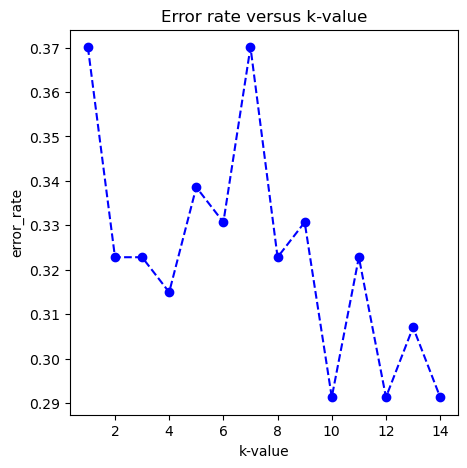

In [50]:
plt.figure(figsize=(5,5))
plt.plot(range(1,15), error_rate, color='blue', linestyle='--', marker='o', markersize=6)
plt.title("Error rate versus k-value")
plt.xlabel('k-value')
plt.ylabel('error_rate')

In [51]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_sm,y_sm)

KNeighborsClassifier(n_neighbors=3)

In [52]:
y_pred1=knn.predict(x_test)
y_pred1

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [53]:
acc1=accuracy_score(y_test,y_pred1)
acc1

0.6771653543307087

In [54]:
f1_value1=f1_score(y_test,y_pred1)
f1_value1

0.5287356321839081

In [55]:
recall1=recall_score(y_test,y_pred1)
recall1

0.6052631578947368

In [56]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[63 26]
 [15 23]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.75        89
           1       0.47      0.61      0.53        38

    accuracy                           0.68       127
   macro avg       0.64      0.66      0.64       127
weighted avg       0.71      0.68      0.69       127



In [57]:
y_pred_train1=knn.predict(x_sm)
acc_train1=accuracy_score(y_sm,y_pred_train1)
acc_train1

0.8611111111111112

In [58]:
cross_val1=cross_val_score(knn,x_sm,y_sm,cv=3,scoring="f1")
cross1=cross_val1.mean()
cross1

0.7744221828052353

In [59]:
roc_score1=metrics.roc_auc_score(y_test,y_pred1)
roc_score1

0.6565641632170313

# SVM

In [60]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_sm,y_sm)

SVC()

In [61]:
y_pred2=sv.predict(x_test) # for testing data
y_pred2

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [62]:
acc2=accuracy_score(y_test,y_pred2) 
acc2

0.6692913385826772

In [63]:
f1_value2=f1_score(y_test,y_pred2)
f1_value2

0.5625

In [64]:
recall2=recall_score(y_test,y_pred2)
recall2

0.7105263157894737

In [65]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[58 31]
 [11 27]]
              precision    recall  f1-score   support

           0       0.84      0.65      0.73        89
           1       0.47      0.71      0.56        38

    accuracy                           0.67       127
   macro avg       0.65      0.68      0.65       127
weighted avg       0.73      0.67      0.68       127



In [66]:
y_pred_train2=sv.predict(x_sm) # for training data
y_pred_train2

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,

In [67]:
acc_train2=accuracy_score(y_sm,y_pred_train2) # for testing data
acc_train2

0.7152777777777778

In [68]:
cross_val2=cross_val_score(sv,x_sm,y_sm,cv=3,scoring="f1")
cross2=cross_val2.mean()
cross2

0.6985149985149985

In [69]:
roc_score2=metrics.roc_auc_score(y_test,y_pred2)
roc_score2

0.6811058545239503

# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [71]:
y_pred3=dt.predict(x_test)
acc3=accuracy_score(y_test,y_pred3) # for testing data
acc3

0.6220472440944882

In [72]:
f1_value3=f1_score(y_test,y_pred3)
f1_value3

0.4

In [73]:
recall3=recall_score(y_test,y_pred3)
recall3

0.42105263157894735

In [74]:
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[63 26]
 [22 16]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72        89
           1       0.38      0.42      0.40        38

    accuracy                           0.62       127
   macro avg       0.56      0.56      0.56       127
weighted avg       0.63      0.62      0.63       127



In [75]:
y_pred_train3=dt.predict(x_sm)
acc_train3=accuracy_score(y_sm,y_pred_train3) # for training data
acc_train3

0.9768518518518519

In [76]:
cross_val3=cross_val_score(dt,x_sm,y_sm,cv=3,scoring="f1")
cross3=cross_val3.mean()
cross3

0.672144838645198

In [77]:
roc_score3=metrics.roc_auc_score(y_test,y_pred3)
roc_score3

0.5644589000591366

# Randonm forest¶

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_sm,y_sm)

RandomForestClassifier()

In [79]:
y_pred4=rf.predict(x_test)
acc4=accuracy_score(y_test,y_pred4)
acc4

0.6771653543307087

In [80]:
f1_value4=f1_score(y_test,y_pred4)
f1_value4

0.4675324675324675

In [81]:
recall4=recall_score(y_test,y_pred4)
recall4

0.47368421052631576

In [82]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[51 38]
 [12 26]]
              precision    recall  f1-score   support

           0       0.81      0.57      0.67        89
           1       0.41      0.68      0.51        38

    accuracy                           0.61       127
   macro avg       0.61      0.63      0.59       127
weighted avg       0.69      0.61      0.62       127



In [83]:
y_pred_train4=rf.predict(x_sm)
acc_train4=accuracy_score(y_sm,y_pred_train4)
acc_train4

0.9768518518518519

In [84]:
cross_val4=cross_val_score(rf,x_sm,y_sm,cv=3,scoring="f1")
cross4=cross_val4.mean()
cross4

0.7471787174185996

In [85]:
roc_score4=metrics.roc_auc_score(y_test,y_pred4)
roc_score4

0.6188645771732701

# Gradient Boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_sm,y_sm)

GradientBoostingClassifier()

In [87]:
y_pred5=gb.predict(x_test)
acc5=accuracy_score(y_test,y_pred5)
acc5

0.7165354330708661

In [88]:
f1_value5=f1_score(y_test,y_pred5)
f1_value5

0.5384615384615385

In [89]:
recall5=recall_score(y_test,y_pred5)
recall5

0.5526315789473685

In [90]:
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[70 19]
 [17 21]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        89
           1       0.53      0.55      0.54        38

    accuracy                           0.72       127
   macro avg       0.66      0.67      0.67       127
weighted avg       0.72      0.72      0.72       127



In [91]:
y_pred_train5=gb.predict(x_sm)
acc_train5=accuracy_score(y_sm,y_pred_train5)
acc_train5

0.8888888888888888

In [92]:
cross_val5=cross_val_score(gb,x_sm,y_sm,cv=3,scoring="f1")
cross5=cross_val5.mean()
cross5

0.7334807278530614

In [93]:
roc_score5=metrics.roc_auc_score(y_test,y_pred5)
roc_score5

0.6695742164399764

# Xg boost

In [94]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [95]:
y_pred6=xg.predict(x_test)
acc6=accuracy_score(y_test,y_pred6)
acc6

0.7086614173228346

In [96]:
f1_value6=f1_score(y_test,y_pred6)
f1_value6

0.4788732394366197

In [97]:
recall6=recall_score(y_test,y_pred6)
recall6

0.4473684210526316

In [98]:
print(confusion_matrix(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[73 16]
 [21 17]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        89
           1       0.52      0.45      0.48        38

    accuracy                           0.71       127
   macro avg       0.65      0.63      0.64       127
weighted avg       0.70      0.71      0.70       127



In [99]:
y_pred_train6=xg.predict(x_sm)
acc_train6=accuracy_score(y_sm,y_pred_train6)
acc_train6

0.9722222222222222

In [100]:
cross_val6=cross_val_score(xg,x_sm,y_sm,cv=3,scoring="f1")
cross6=cross_val6.mean()
cross6

0.7434283307437353

In [101]:
roc_score6=metrics.roc_auc_score(y_test,y_pred6)
roc_score6

0.6337965700768776

# ANN

In [102]:
from sklearn.neural_network import MLPClassifier
ANN=MLPClassifier(hidden_layer_sizes=(50,2),learning_rate_init=0.1,max_iter=3,random_state=2)
ANN.fit(x_sm,y_sm)


MLPClassifier(hidden_layer_sizes=(50, 2), learning_rate_init=0.1, max_iter=3,
              random_state=2)

In [103]:
y_pred7=ANN.predict(x_test)
acc7=accuracy_score(y_test,y_pred7)
acc7

0.6220472440944882

In [104]:
f1_value7=f1_score(y_test,y_pred7)
f1_value7

0.5200000000000001

In [105]:
recall7=recall_score(y_test,y_pred7)
recall7

0.6842105263157895

In [106]:
print(confusion_matrix(y_test,y_pred7))
print(classification_report(y_test,y_pred7))

[[53 36]
 [12 26]]
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        89
           1       0.42      0.68      0.52        38

    accuracy                           0.62       127
   macro avg       0.62      0.64      0.60       127
weighted avg       0.70      0.62      0.64       127



In [107]:
y_pred_train7=ANN.predict(x_sm)
acc_train7=accuracy_score(y_sm,y_pred_train7)
acc_train7

0.6805555555555556

In [108]:
cross_val7=cross_val_score(ANN,x_sm,y_sm,cv=3,scoring="f1")
cross7=cross_val7.mean()
cross7

0.6901867270824065

In [109]:
roc_score7=metrics.roc_auc_score(y_test,y_pred7)
roc_score7

0.6398580721466587

## Hyperparameter tuning

In [110]:
# hyper parameter tuning for decision tree
from sklearn.model_selection import GridSearchCV
params={"criterion":("gini","entropy"),
       "splitter":("best","random"),
       "max_depth":(list(range(1,6))),
       "min_samples_split":[1,2,3,4,5,6],
       "min_samples_leaf":list(range(1,6))
       }

In [111]:
tree_clf=DecisionTreeClassifier(random_state=3)
tree_cv=GridSearchCV(tree_clf,params,scoring="f1",n_jobs=1,verbose=1,cv=3)
tree_cv.fit(x_sm,y_sm)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=3), n_jobs=1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'splitter': ('best', 'random')},
             scoring='f1', verbose=1)

In [112]:
best_params=tree_cv.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'splitter': 'best'}

In [113]:
dt1=DecisionTreeClassifier(criterion= 'gini',
 max_depth= 4,
 min_samples_leaf= 1,
 min_samples_split= 2,
 splitter= 'best')

In [114]:
dt1.fit(x_sm,y_sm)
y_pred_tune=dt1.predict(x_test)
acc_tune=accuracy_score(y_test,y_pred_tune)
acc_tune

0.6850393700787402

In [115]:
y_pred_tune_train=dt1.predict(x_sm)
acc_tune_train=accuracy_score(y_sm,y_pred_tune_train)
acc_tune_train

0.7662037037037037

In [116]:
print(acc_tune_train)
print(acc_tune)

0.7662037037037037
0.6850393700787402


In [117]:
# hyperparameter tuning in xgboost
from sklearn.model_selection import RandomizedSearchCV
param_grid={"gamma":[0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5],
           "learning_rate":[0.01,0.03,0.06,0.1,0.15,1.1,1.2,2.3,4.5,5.6,6.7,7.8,8.9,9.0,0.1,1.2,2.3,3.4,4.5,5],
           "n_estimator":[50,55,60,65,70,75,80,85,90,67,67,65,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80],
           "reg_alpha":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5],
           "reg_lambda":[0.1,0.2,0.4,0.8,1.6,3.2,6.4,3,4,5,6,7,8,9,10,11,12,13,14,15]}

In [118]:
xgb=XGBClassifier(random_state=42)

In [119]:
rcv=RandomizedSearchCV(estimator=xgb,scoring="f1",param_distributions=param_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)

In [120]:
rcv.fit(x_sm,y_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[11:24:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                          0.15, 1.1, 1.2, 2.3,
                

In [121]:
best_params=rcv.best_params_
best_params

{'reg_lambda': 4,
 'reg_alpha': 1.5,
 'n_estimator': 69,
 'learning_rate': 2.3,
 'gamma': 0}

In [122]:
xgb2=XGBClassifier(reg_lambda=5,
 reg_alpha=0.1,
 n_estimator= 67,
 learning_rate= 2.3,
 gamma= 0.1)

In [123]:
xgb2.fit(x_sm,y_sm)
y_pred_tune1=xgb2.predict(x_test)

[11:25:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



In [124]:
acc_tune1=accuracy_score(y_test,y_pred_tune1)
acc_tune1

0.7086614173228346

In [125]:
y_pred_tune1=xgb2.predict(x_sm)
acc_train1=accuracy_score(y_sm,y_pred_tune1)
acc_train1

0.9606481481481481

In [126]:
# hyperparameter tuning for random forest
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


In [127]:
rf_cv.fit(x_sm,y_sm)
rf_best_params=rf_cv.best_params_
rf_best_params

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [128]:
rf2=RandomForestClassifier(n_estimators= 1000,
 min_samples_split= 2,
 min_samples_leaf=1,
 max_features='auto',
 max_depth= 10,
 bootstrap=True)

In [129]:
rf2.fit(x_sm,y_sm)
y_pred_tune2=rf2.predict(x_test)

In [130]:
acc_tune=accuracy_score(y_test,y_pred_tune2)
acc_tune

0.7086614173228346

In [131]:
y_pre=rf2.predict(x_sm)
acc_train=accuracy_score(y_sm,y_pre)
acc_train

0.9606481481481481

#### Comparing results

In [132]:
dict={"model":["LogisticRegression","knn","SVM","decision tree","gradient boosting","random forest","xgboost","ANN"],
     'accuracy_train':[acc_train,acc_train1,acc_train2,acc_train3,acc_train4,acc_train5,acc_train6,acc_train7],
     "accuracy_test":[acc,acc1,acc2,acc3,acc4,acc5,acc6,acc7],
      "f1-score":[f1_value,f1_value1,f1_value2,f1_value3,f1_value4,f1_value5,f1_value6,f1_value7],
     "cross_val_score":[cross,cross1,cross2,cross3,cross4,cross5,cross6,cross7],
     "roc_score":[roc_score,roc_score1,roc_score2,roc_score3,roc_score4,roc_score5,roc_score6,roc_score7]}

In [133]:
scores=pd.DataFrame(dict)
scores

,model,accuracy_train,accuracy_test,f1-score,cross_val_score,roc_score
0,LogisticRegression,0.960648,0.606299,0.509804,0.696716,0.628622
1,knn,0.960648,0.677165,0.528736,0.774422,0.656564
2,SVM,0.715278,0.669291,0.562500,0.698515,0.681106
3,decision tree,0.976852,0.622047,0.400000,0.672145,0.564459
4,gradient boosting,0.976852,0.677165,0.467532,0.747179,0.618865
5,random forest,0.888889,0.716535,0.538462,0.733481,0.669574
6,xgboost,0.972222,0.708661,0.478873,0.743428,0.633797
7,ANN,0.680556,0.622047,0.520000,0.690187,0.639858


In [134]:
scores.sort_values(by="accuracy_test")

,model,accuracy_train,accuracy_test,f1-score,cross_val_score,roc_score
0,LogisticRegression,0.960648,0.606299,0.509804,0.696716,0.628622
3,decision tree,0.976852,0.622047,0.400000,0.672145,0.564459
7,ANN,0.680556,0.622047,0.520000,0.690187,0.639858
2,SVM,0.715278,0.669291,0.562500,0.698515,0.681106
1,knn,0.960648,0.677165,0.528736,0.774422,0.656564
4,gradient boosting,0.976852,0.677165,0.467532,0.747179,0.618865
6,xgboost,0.972222,0.708661,0.478873,0.743428,0.633797
5,random forest,0.888889,0.716535,0.538462,0.733481,0.669574


### ROC AUC curve

In [135]:
from sklearn.metrics import plot_roc_curve,auc

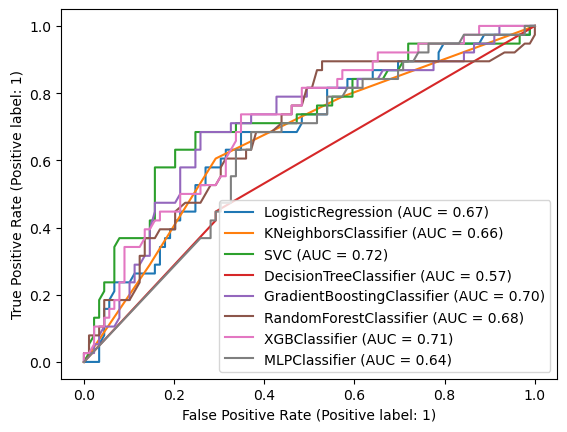

In [136]:
disp=plot_roc_curve(LR,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_);
plot_roc_curve(sv,x_test,y_test,ax=disp.ax_);
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_);
plot_roc_curve(gb,x_test,y_test,ax=disp.ax_);
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_);
plot_roc_curve(xg,x_test,y_test,ax=disp.ax_);
plot_roc_curve(ANN,x_test,y_test,ax=disp.ax_);

# Conclusion

### 1. From the above results we observed that ,ANN yielded the best accuracy score 0f 74.56 %.
### And f1-score of 56 % for class 1(that is positive class),and 82 % for the class0(which is negative class).
### so we consider it as a best model.


### 2. From ROC-AUC curve "Logistic Regression" has covered maximum area under the curve with AUC=76 %.